In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import pandas_profiling

### By reading the data, it can be identified that variables such as rest blood pressure (trestbps), cholesterol (chol), max heart rate (thalach) and exercise induced ST depression (oldpeak) have continuous forms while all other features have discrete form.

In [3]:
# Read the data and save it into a data frame
data = pd.read_csv('data/heart.csv', sep = ',')
data.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [4]:
# Dimension of the dataframe.
data_shape = data.shape

print("Number of Observations: ", data_shape[0])
print("Number of Columns: ", data_shape[1])

Number of Observations:  303
Number of Columns:  14


In [5]:
# data characteristics
data.describe().T

count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0    1.399340   0.616226    0.0    1.0    1.0    2.0    2.0
ca        303.0    0.729373   1.022606    0.0    0.0    0.0    1.0    4.0
thal      303.0    2.313531   0.612277    0.0    2.0    2.0    3.0    3.0
target    303.0    0.544554   0.498835    0.0    0.0    1.0    1.0    1.0

In [6]:
# Data (Storage) Type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
# check the null values
data.isnull().sum() 

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
#Variable Balance from the targets. This means that, from 303 patients, 165 of them have presence of heart disease, while the
# rest, 138 out of 303, do not have presence of heart disease.
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

## No-Graphical Techniques of  Univariate Analysis

In [9]:
# Mode of each variable. Mode tell us the most common value or the value that appears the most in a sample or a population.
data.mode()

age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  58.0  1.0  0.0     120.0   197  0.0      1.0    162.0    0.0      0.0   
1   NaN  NaN  NaN       NaN   204  NaN      NaN      NaN    NaN      NaN   
2   NaN  NaN  NaN       NaN   234  NaN      NaN      NaN    NaN      NaN   

   slope   ca  thal  target  
0    2.0  0.0   2.0     1.0  
1    NaN  NaN   NaN     NaN  
2    NaN  NaN   NaN     NaN

In [10]:
# Median of each variable. Once the values of a sample or population are sorted, the value which is exactly at the half of
# all sorted data, is the median.
data.median()

age          55.0
sex           1.0
cp            1.0
trestbps    130.0
chol        240.0
fbs           0.0
restecg       1.0
thalach     153.0
exang         0.0
oldpeak       0.8
slope         1.0
ca            0.0
thal          2.0
target        1.0
dtype: float64

In [11]:
# Mean of each variable.
data.mean()

age          54.366337
sex           0.683168
cp            0.966997
trestbps    131.623762
chol        246.264026
fbs           0.148515
restecg       0.528053
thalach     149.646865
exang         0.326733
oldpeak       1.039604
slope         1.399340
ca            0.729373
thal          2.313531
target        0.544554
dtype: float64

In [12]:
# Stand dev of each variable. The standard deviation represent how far are the values from the mean.
data.std()

age          9.082101
sex          0.466011
cp           1.032052
trestbps    17.538143
chol        51.830751
fbs          0.356198
restecg      0.525860
thalach     22.905161
exang        0.469794
oldpeak      1.161075
slope        0.616226
ca           1.022606
thal         0.612277
target       0.498835
dtype: float64

In [13]:
# Skew
"""
    For this part I consider that is really important to remember that skewness is:
    ASF > 0, Positive Asymmetry.
    ASF < 0, Negative Assymetry.
    ASF = 0, Assymetric.

    For this dataframe it can be seen that most of the data is non symmetrical, with a right bias, which means that the
    right side of the distribution is longer or fatter, so the mean and median will be greater than the mode.
    
"""
#skew_heart_disease = heart_disease.skew()
#skew_heart_disease

data.apply(scipy.stats.skew)

age        -0.201460
sex        -0.787412
cp          0.482329
trestbps    0.710230
chol        1.137733
fbs         1.976803
restecg     0.161717
thalach    -0.534746
exang       0.738851
oldpeak     1.263426
slope      -0.505796
ca          1.303926
thal       -0.474359
target     -0.178930
dtype: float64

In [14]:
#Kurtosis
"""
    It is also important to remember that kurtosis is the measure of outliers present in the distribution.
    Ap > 3, Leptokurtic means that data are heavy-tailed or profusion of outliers.
    Ap < 3, Platikurtic means the distribution produces fewer and less extreme outliers than does the normal distribution.
    Ap = 3, Mesokurtic  means means that if the data follows a normal distribution.

    Most of the data is less than 3, meaning that we have fewer and less extreme outliers which is good for the analysis,
    only one has a heavy-tailed outlier while the rest produces fewer and less extreme outliers than does the normal.
    distribution.
    
"""

data.apply(scipy.stats.kurtosis)

age        -0.552999
sex        -1.379982
cp         -1.193211
trestbps    0.894057
chol        4.411682
fbs         1.907752
restecg    -1.360027
thalach    -0.080689
exang      -1.454100
oldpeak     1.530193
slope      -0.636950
ca          0.805731
thal        0.273285
target     -1.967984
dtype: float64

## Graphical Techniques of  Univariate Analysis

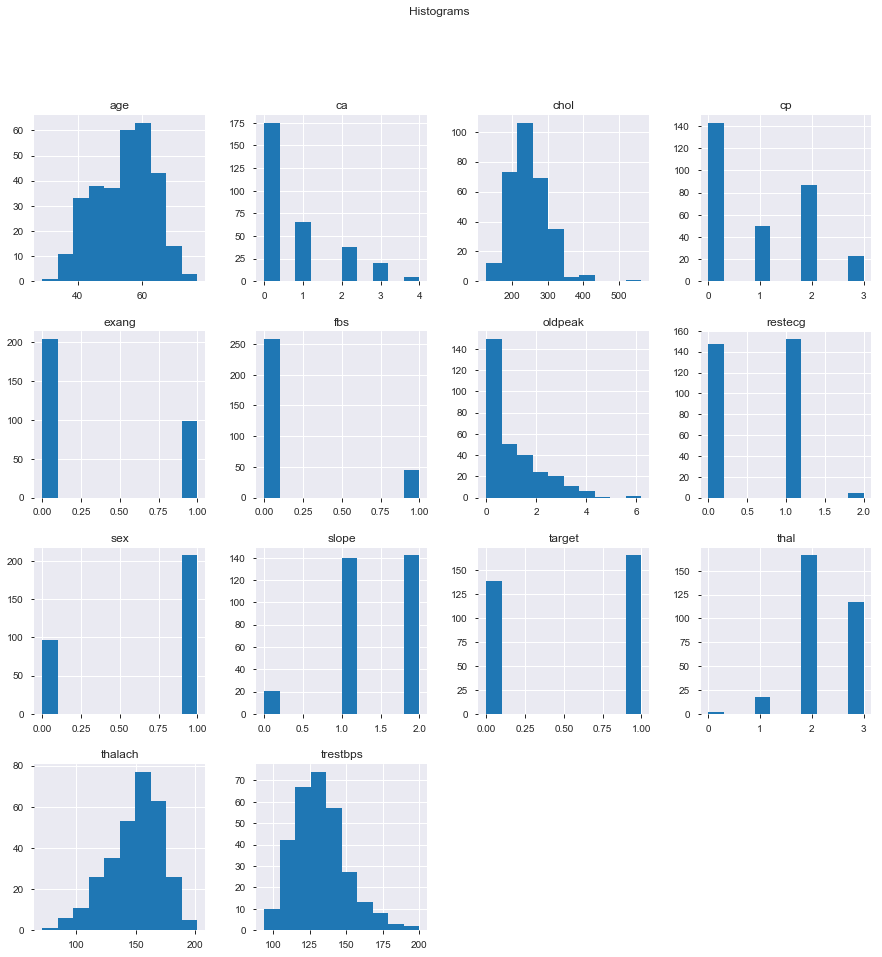

In [15]:
# Here are some histograms for each variable of the dataframe.
data.hist(figsize = (15, 15))
plt.suptitle("Histograms")
plt.savefig("pete1", dpi = 100)
plt.show()

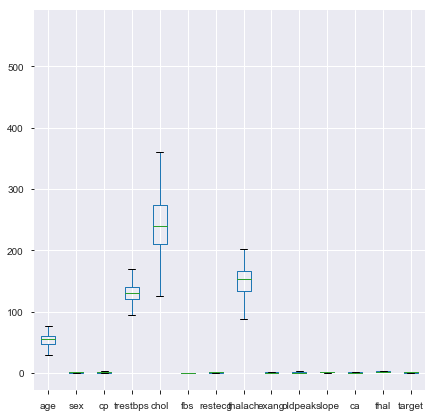

In [16]:
#blox plot
data.boxplot(figsize = (7, 7))

### Let's see the distribution of continous features.

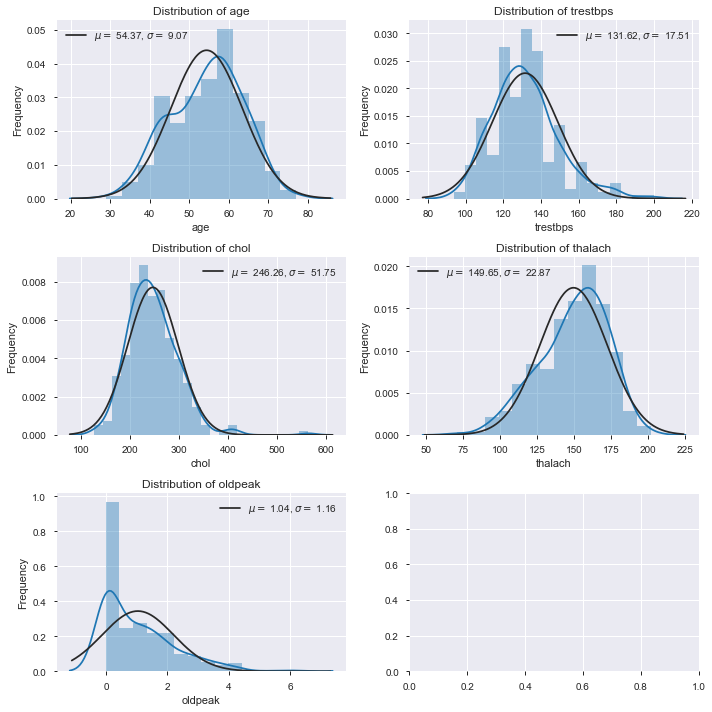

In [17]:
# As it was mention before, these are the continous features and on the following graphs you will see the disribution of each
# continuous variable. 
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

f, ax = plt.subplots(3, 2, figsize = (10, 10))
for i, feature in enumerate(continuous_features):
    
    # thanks to scipy librabry, I can just import the normal distribution to work with it and generate the necessary
    # variables to draw the graph.
    (mu, sigma) = scipy.stats.norm.fit(data[feature])
    # alpha = scipy.stats.skew(data[feature])
    sns.distplot(data[feature], fit = scipy.stats.norm, ax = ax[i//2][i%2])
    ax[i//2][i%2].set_title('Distribution of {}'.format(feature))
    # ax[i//2][i%2].legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}, $\\alpha=$ {:.2f}'.format(mu, sigma, alpha)], loc = 'best')
    ax[i//2][i%2].legend(['$\mu=$ {:.2f}, $\sigma=$ {:.2f}'.format(mu, sigma)], loc = 'best')
    ax[i//2][i%2].set_ylabel('Frequency')
    
plt.savefig("pete3", dpi = 100)
plt.tight_layout()
plt.show()

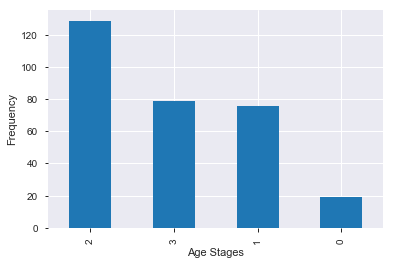

In [18]:
 """
 
 Here, the ages of pacients were 'gouped' into stages, and the graph below shows the frequency of appearance of stages in
 this data set for pacients with heart disease. The stages are:
 
 Young adult: 0 (18 - 25 aprox)
 Adult: 1 (25 -35 aprox)
 Mature Adult: 2 (36 - 60 aprox)
 Old: 4 (> 60)
 
 """

bins = [28,40,50,60,80]
names = ['Young Adult','Adult','Mature Adult','Old']
data['age'] = pd.cut(data['age'], bins = bins, labels = names)
age_map = {'Young Adult':'0','Adult':'1','Mature Adult':'2','Old':'3'}
data['age'] = data['age'].map(age_map)
data['age'] = data['age'].astype('int64')
data['age'].value_counts().plot.bar()
plt.xlabel('Age Stages')
plt.ylabel('Frequency')
plt.savefig("pete2", dpi = 100)
plt.show()

### On the following graphs we will see how the continous features vary with age.

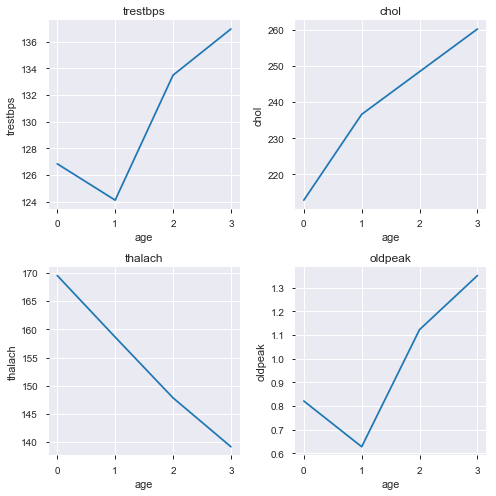

In [19]:
# As we can see, in most of the cases, these variables with respect age, tend to go up, except for thalach. We will analyze
# some of this grahs on the paper.

continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

f, ax = plt.subplots(2, 2, figsize = (7, 7))
continuous_features.remove('age')

for i, feature in enumerate(continuous_features):
    df = data.groupby('age')[feature].mean().reset_index()
    sns.lineplot(data = df, y = df[feature], x = df['age'], ax = ax[i//2][i%2])
    ax[i//2][i%2].set_title('{}'.format(feature))

plt.tight_layout()
plt.savefig("pete5", dpi = 100)
plt.show()

In [20]:
### Pass from numerical into categorical

In [21]:
data.columns = ['Age', 'Sex',  'Chest_pain_type', 'Resting_blood_pressure', 'Serum_cholestoral(mg/dl)', 'Fasting_blood_sugar(mg/dl)', 'Resting_ECG_results', 'Max_heart_rate', 'Exercise_induced_angina', 'Oldpeak', 'Slope', 'No.of_major_vessels', 'thalassemia','target']
data.columns[0]

'Age'

In [22]:
num_cat_data = data.copy()

In [23]:
# Covert the column sex from numerical to categorical.
num_cat_data['Sex'][num_cat_data['Sex']==1]='Male' 
num_cat_data['Sex'][num_cat_data['Sex']==0]='Female'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
num_cat_data.head()

Age     Sex  Chest_pain_type  Resting_blood_pressure  \
0    3    Male                3                     145   
1    0    Male                2                     130   
2    1  Female                1                     130   
3    2    Male                1                     120   
4    2  Female                0                     120   

   Serum_cholestoral(mg/dl)  Fasting_blood_sugar(mg/dl)  Resting_ECG_results  \
0                       233                           1                    0   
1                       250                           0                    1   
2                       204                           0                    0   
3                       236                           0                    1   
4                       354                           0                    1   

   Max_heart_rate  Exercise_induced_angina  Oldpeak  Slope  \
0             150                        0      2.3      0   
1             187                        0      3.5      0   
2             172                        0      1.4      2   
3             178                        0      0.8      2   
4             163                        1      0.6      2   

   No.of_major_vessels  thalassemia  target  
0                    0            1       1  
1                    0            2       1  
2                    0            2       1  
3                    0            2       1  
4                    0            2       1

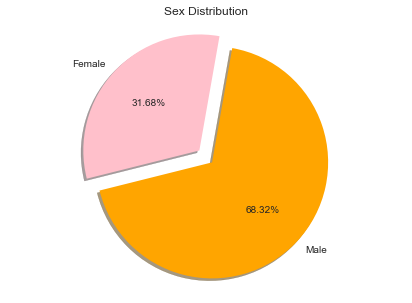

In [25]:
plt.figure(figsize = (7, 5))
sex_count = [len(num_cat_data[num_cat_data['Sex'] == 'Female']),len(num_cat_data[num_cat_data['Sex'] == 'Male'])]
#labels = ['Female', 'Male']
#colors = ['pink', 'orange']
explode = (0.05, 0.1)
#plt.pie(sex_count, explode = explode, labels = labels, colors = colors, autopct = '%4.2f%%', shadow = True, startangle = 80)
plt.pie(sex_count, explode = explode, labels = ['Female', 'Male'], colors = ['pink', 'orange'], autopct = '%4.2f%%', shadow = True, startangle = 80)
plt.title('Sex Distribution')
plt.axis('equal')
plt.savefig("pete4", dpi = 100)
plt.show()

## No-Graphical Techniques of Multivariate Analysis

In [26]:
# correlation 
"""
    The correlation is a statistical measure that indicates how strongly two variables are related.
    value > 0 and value =< 1: means that as one variable increase the other does the same: possitive correlation
    values < 0 and values >= -1: means that if one increases, the other one dicreases: negative correlation
    value = 0: means there is no relationship between the variables: zero correlation
    
"""
data_correlation = data.corr()
data_correlation

Age       Sex  Chest_pain_type  \
Age                         1.000000 -0.107285        -0.078296   
Sex                        -0.107285  1.000000        -0.049353   
Chest_pain_type            -0.078296 -0.049353         1.000000   
Resting_blood_pressure      0.255433 -0.056769         0.047608   
Serum_cholestoral(mg/dl)    0.228472 -0.197912        -0.076904   
Fasting_blood_sugar(mg/dl)  0.130804  0.045032         0.094444   
Resting_ECG_results        -0.119982 -0.058196         0.044421   
Max_heart_rate             -0.377604 -0.044020         0.295762   
Exercise_induced_angina     0.101108  0.141664        -0.394280   
Oldpeak                     0.211486  0.096093        -0.149230   
Slope                      -0.161303 -0.030711         0.119717   
No.of_major_vessels         0.255967  0.118261        -0.181053   
thalassemia                 0.043504  0.210041        -0.161736   
target                     -0.190974 -0.280937         0.433798   

                            Resting_blood_pressure  Serum_cholestoral(mg/dl)  \
Age                                       0.255433                  0.228472   
Sex                                      -0.056769                 -0.197912   
Chest_pain_type                           0.047608                 -0.076904   
Resting_blood_pressure                    1.000000                  0.123174   
Serum_cholestoral(mg/dl)                  0.123174                  1.000000   
Fasting_blood_sugar(mg/dl)                0.177531                  0.013294   
Resting_ECG_results                      -0.114103                 -0.151040   
Max_heart_rate                           -0.046698                 -0.009940   
Exercise_induced_angina                   0.067616                  0.067023   
Oldpeak                                   0.193216                  0.053952   
Slope                                    -0.121475                 -0.004038   
No.of_major_vessels                       0.101389                  0.070511   
thalassemia                               0.062210                  0.098803   
target                                   -0.144931                 -0.085239   

                            Fasting_blood_sugar(mg/dl)  Resting_ECG_results  \
Age                                           0.130804            -0.119982   
Sex                                           0.045032            -0.058196   
Chest_pain_type                               0.094444             0.044421   
Resting_blood_pressure                        0.177531            -0.114103   
Serum_cholestoral(mg/dl)                      0.013294            -0.151040   
Fasting_blood_sugar(mg/dl)                    1.000000            -0.084189   
Resting_ECG_results                          -0.084189             1.000000   
Max_heart_rate                               -0.008567             0.044123   
Exercise_induced_angina                       0.025665            -0.070733   
Oldpeak                                       0.005747            -0.058770   
Slope                                        -0.059894             0.093045   
No.of_major_vessels                           0.137979            -0.072042   
thalassemia                                  -0.032019            -0.011981   
target                                       -0.028046             0.137230   

                            Max_heart_rate  Exercise_induced_angina   Oldpeak  \
Age                              -0.377604                 0.101108  0.211486   
Sex                              -0.044020                 0.141664  0.096093   
Chest_pain_type                   0.295762                -0.394280 -0.149230   
Resting_blood_pressure           -0.046698                 0.067616  0.193216   
Serum_cholestoral(mg/dl)         -0.009940                 0.067023  0.053952   
Fasting_blood_sugar(mg/dl)       -0.008567                 0.025665  0.005747   
Resting_ECG_results               0.044123                -0.070733 -0.05

In [27]:
# covariance
"""
    Covariance is a measure of how much two random variables vary together.

    value > 0: y increases and x decreases: large possitive covariance
    values < 0: y decreases and x increases: large negative covariance
    value = 0: there is no linear tendency: nearly zero covariance
    
"""

covariance_data = data.cov()
covariance_data

Age       Sex  Chest_pain_type  \
Age                          0.751514 -0.043341        -0.070050   
Sex                         -0.043341  0.217166        -0.023736   
Chest_pain_type             -0.070050 -0.023736         1.065132   
Resting_blood_pressure       3.883549 -0.463970         0.861714   
Serum_cholestoral(mg/dl)    10.265698 -4.780309        -4.113774   
Fasting_blood_sugar(mg/dl)   0.040391  0.007475         0.034719   
Resting_ECG_results         -0.054696 -0.014261         0.024108   
Max_heart_rate              -7.497880 -0.469871         6.991618   
Exercise_induced_angina      0.041178  0.031014        -0.191168   
Oldpeak                      0.212868  0.051993        -0.178821   
Slope                       -0.086169 -0.008819         0.076137   
No.of_major_vessels          0.226914  0.056357        -0.191080   
thalassemia                  0.023091  0.059930        -0.102201   
target                      -0.082585 -0.065307         0.223330   

                            Resting_blood_pressure  Serum_cholestoral(mg/dl)  \
Age                                       3.883549                 10.265698   
Sex                                      -0.463970                 -4.780309   
Chest_pain_type                           0.861714                 -4.113774   
Resting_blood_pressure                  307.586453                111.967215   
Serum_cholestoral(mg/dl)                111.967215               2686.426748   
Fasting_blood_sugar(mg/dl)                1.109042                  0.245427   
Resting_ECG_results                      -1.052324                 -4.116703   
Max_heart_rate                          -18.759131                -11.800494   
Exercise_induced_angina                   0.557111                  1.631991   
Oldpeak                                   3.934486                  3.246794   
Slope                                    -1.312832                 -0.128964   
No.of_major_vessels                       1.818373                  3.737252   
thalassemia                               0.668022                  3.135488   
target                                   -1.267950                 -2.203855   

                            Fasting_blood_sugar(mg/dl)  Resting_ECG_results  \
Age                                           0.040391            -0.054696   
Sex                                           0.007475            -0.014261   
Chest_pain_type                               0.034719             0.024108   
Resting_blood_pressure                        1.109042            -1.052324   
Serum_cholestoral(mg/dl)                      0.245427            -4.116703   
Fasting_blood_sugar(mg/dl)                    0.126877            -0.015769   
Resting_ECG_results                          -0.015769             0.276528   
Max_heart_rate                               -0.069897             0.531462   
Exercise_induced_angina                       0.004295            -0.017474   
Oldpeak                                       0.002377            -0.035883   
Slope                                        -0.013147             0.030151   
No.of_major_vessels                           0.050259            -0.038741   
thalassemia                                  -0.006983            -0.003858   
target                                       -0.004983             0.035998   

                            Max_heart_rate  Exercise_induced_angina   Oldpeak  \
Age                              -7.497880                 0.041178  0.212868   
Sex                              -0.469871                 0.031014  0.051993   
Chest_pain_type                   6.991618                -0.191168 -0.178821   
Resting_blood_pressure          -18.759131                 0.557111  3.934486   
Serum_cholestoral(mg/dl)        -11.800494                 1.631991  3.246794   
Fasting_blood_sugar(mg/dl)       -0.069897                 0.004295  0.002377   
Resting_ECG_results               0.531462                -

## Graphical Techniques of  Multivariate Analysis

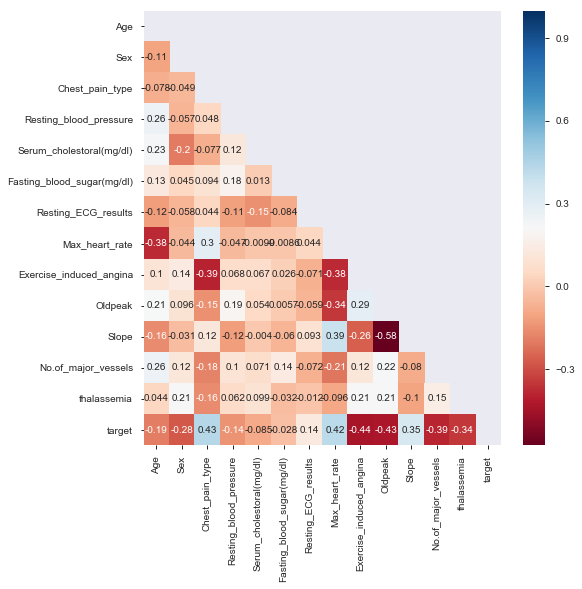

In [44]:
# corelation matrix
correlation_matrix = data.corr()

# Heatmap
# The matrix below shows the correlation of all the variables from the dataset. As it can be seen, the variables of this data
# set are neither strongly direct correlated nor indirect.
mask = np.zeros_like (correlation_matrix, dtype = np.bool) 
mask[np.triu_indices_from (mask)] = True 
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(correlation_matrix, annot = True, cmap = 'RdBu', mask = mask)
plt.savefig("pete7", dpi = 100)
plt.show()

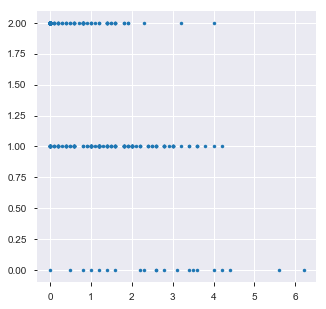

In [45]:
plt.rcParams['figure.figsize'] = (5, 5)
plt.plot(data["Oldpeak"], data["Slope"], '.')
plt.savefig("pete8", dpi = 100)
plt.show()

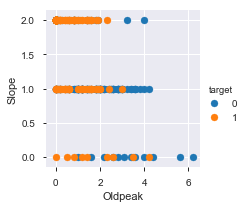

In [43]:
# 0: no presence of heart disease
# 1: presence of heart disease
g2 = sns.FacetGrid(data, hue = 'target')
g2 = g2.map(plt.scatter, "Oldpeak", "Slope")
g2 = g2.add_legend()
plt.savefig("pete6", dpi = 100)
plt.show()

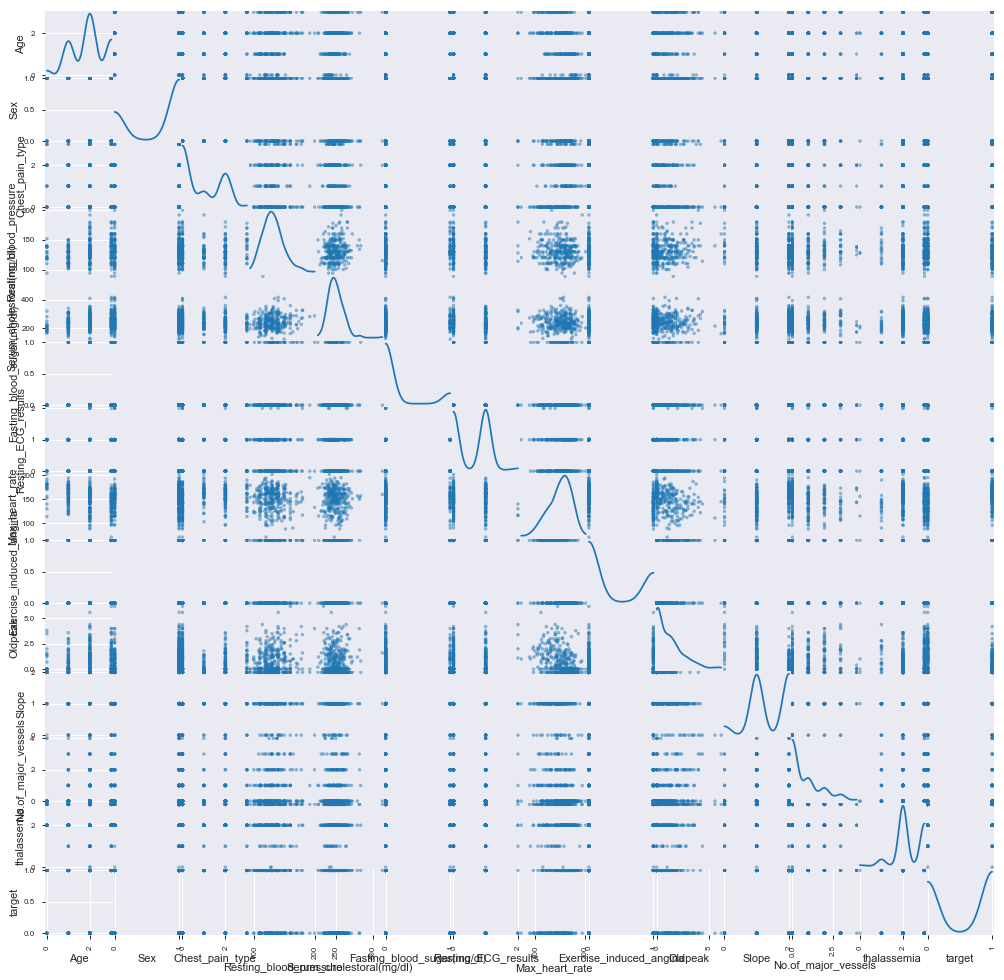

In [41]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, figsize = (17, 17), diagonal='kde')
plt.show()

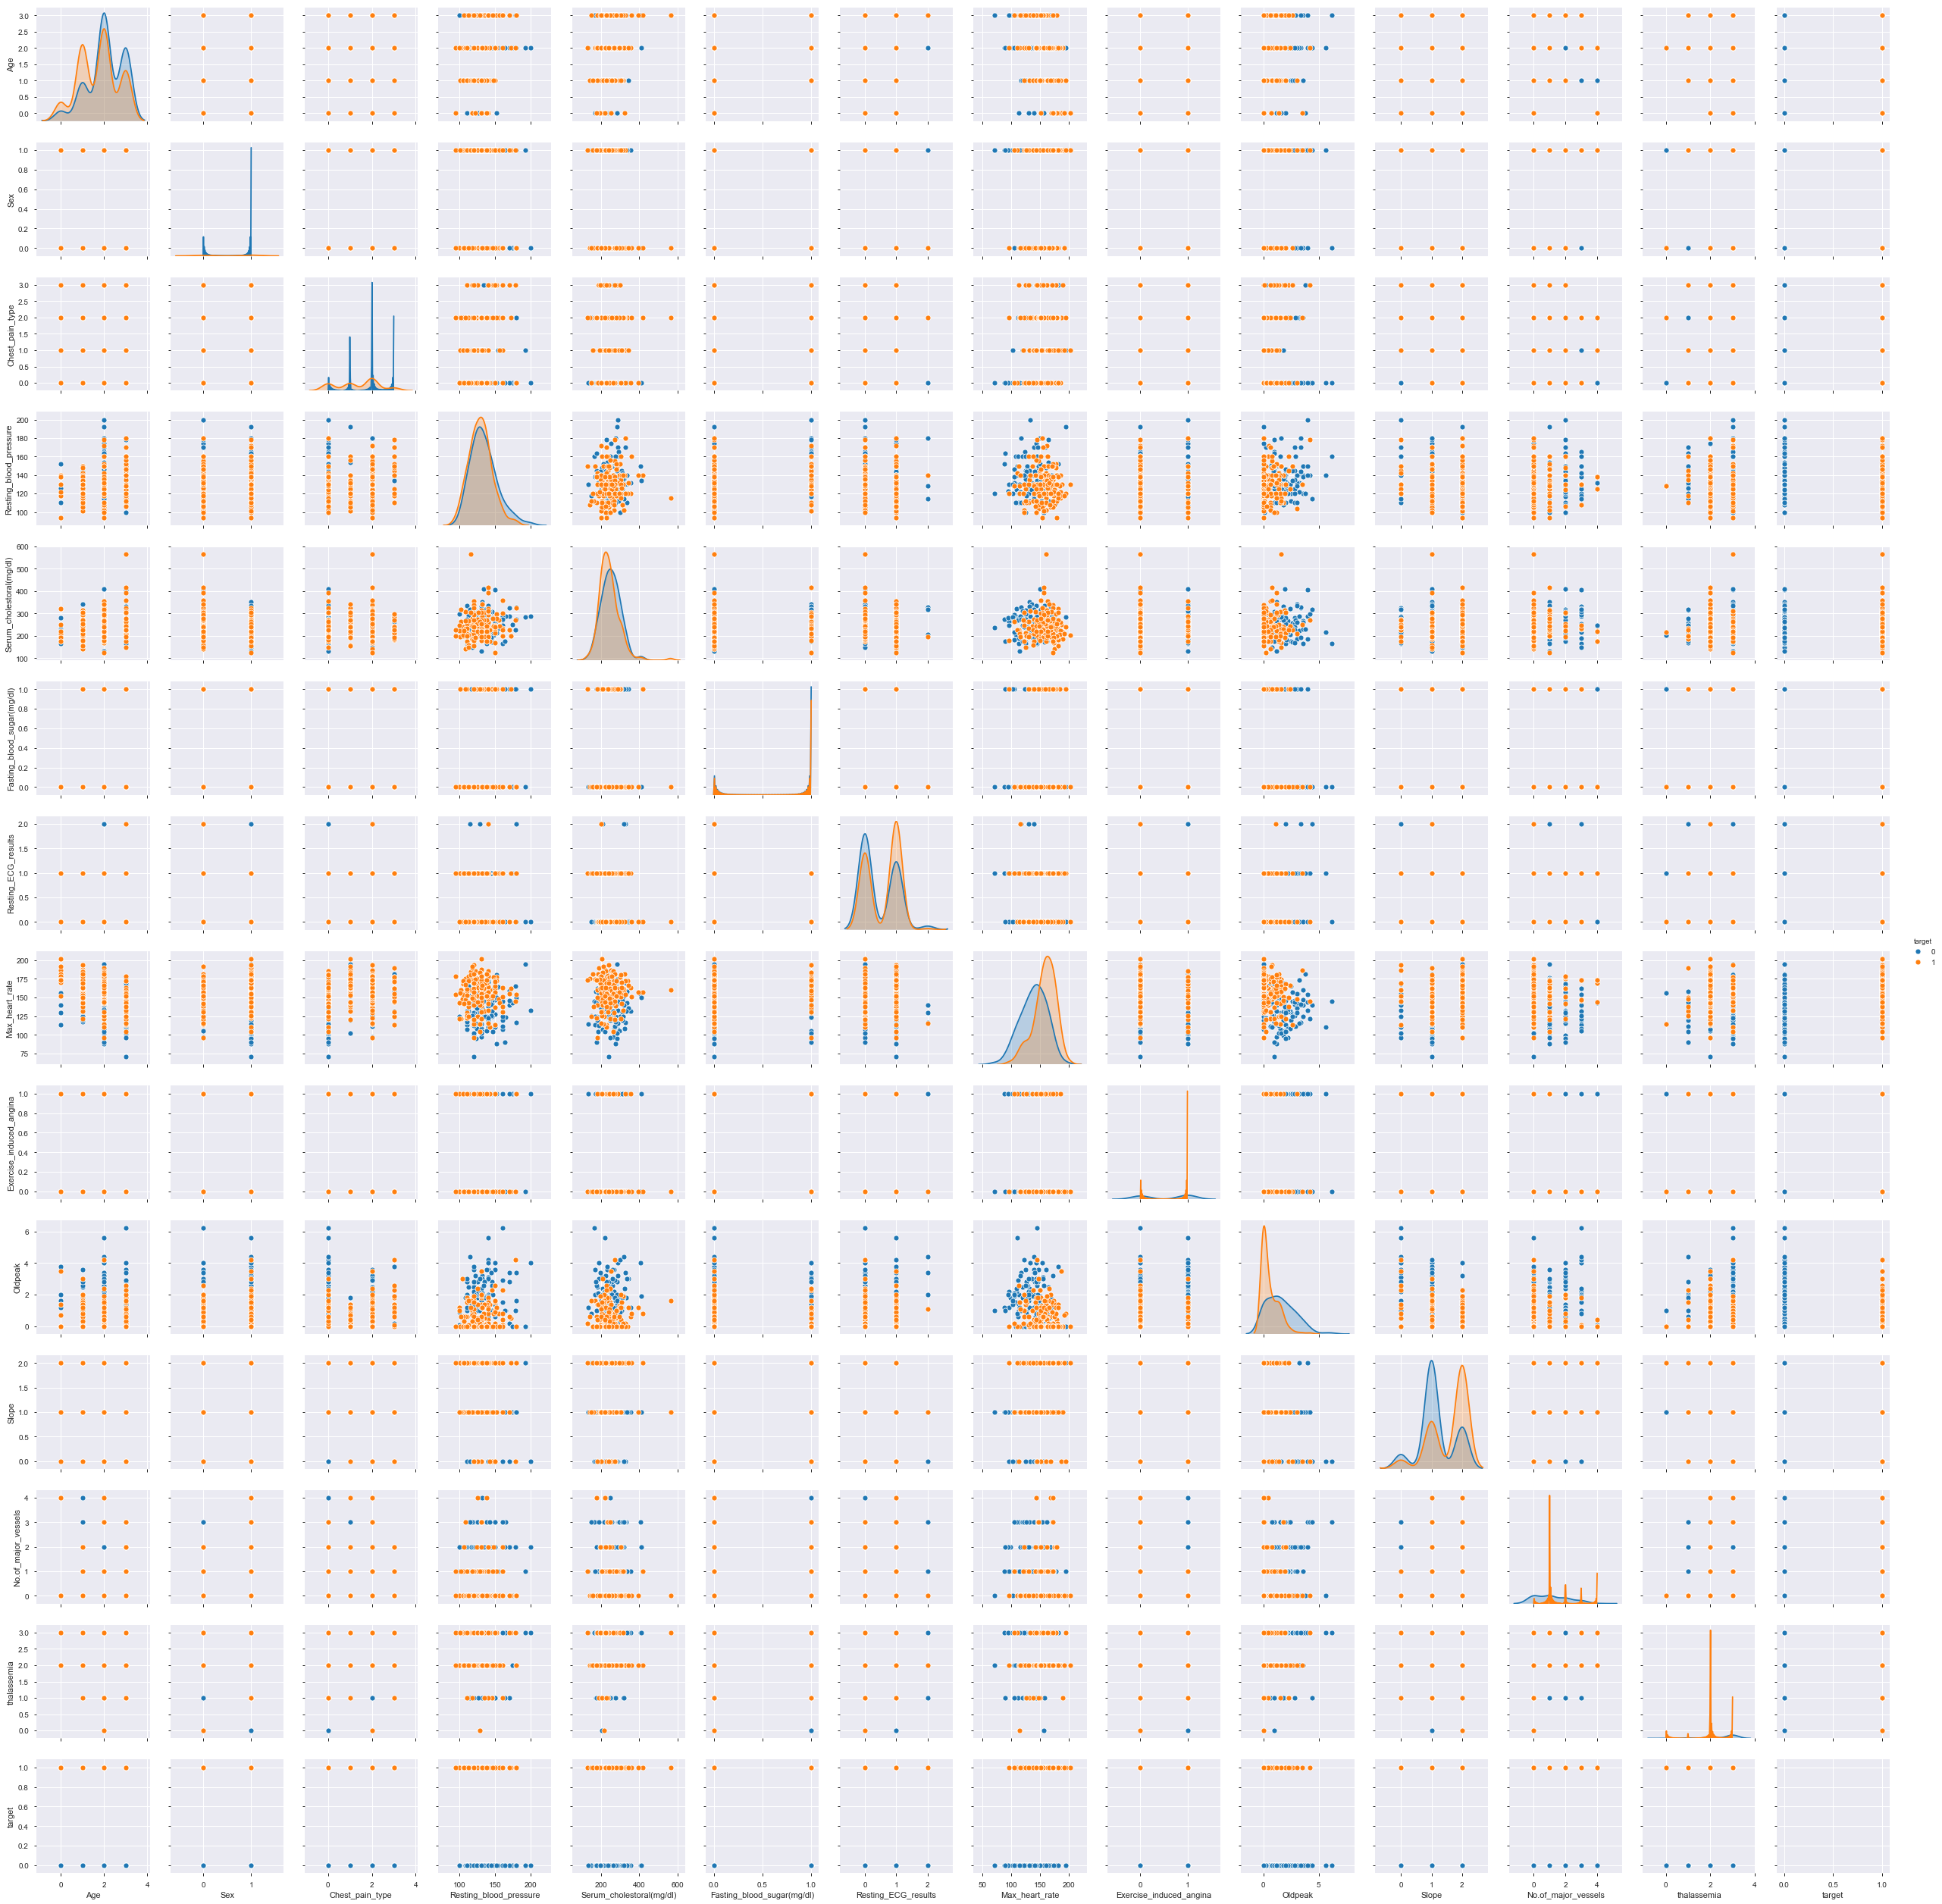

In [42]:
g2 = sns.pairplot(data, hue = "target")
plt.show()

In [32]:
pandas_profiling.ProfileReport(data)